### Simulation der Brownschen Bewegung(BM), in python.

Bm is defined by S0 > 0 und die folgenden Stochastischen Differential Equation (SDE)

## $dS_t = \mu S_tdt+ \delta S_t dW_t $

Intigrierte Form:
 + $ log S_t = log S_0 +  \int_{1}^{0} (\mu +frac{\delta^2}{2})ds + \int_{1}^{0} \delta W_s  $


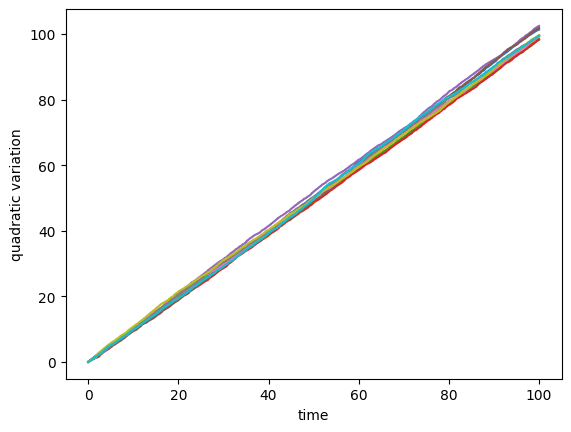

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def quadratic_variation(B):
    # Sicherstellen, dass beim Prepend die richtige Form verwendet wird
    if B.ndim == 1:
        prepend = np.array([0.])
    else:
        prepend = np.zeros((1, B.shape[1]))
    diffs = np.diff(B, axis=0, prepend=prepend)
    return np.cumsum(np.power(diffs, 2), axis=0)


def main():
    n = 10000
    d = 10
    T = 100.0
    times = np.linspace(0, T, n)
    dt = times[1] - times[0]
    dB = np.sqrt(dt) * np.random.normal(size=(n-1, d))
    B0 = np.zeros(shape=(1, d))
    B = np.concatenate([B0, np.cumsum(dB, axis=0)], axis=0)
    plt.plot(times, quadratic_variation(B))
    plt.xlabel('time')
    plt.ylabel('quadratic variation')
    plt.show()

if __name__ == "__main__":
    main()
